In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Now there is null in Age and Cabin but as cabin no is not necessary for our analysis as yet we will focus mainly on the age for now**
* For it we will replace the null with the median on the basis of Sex also

In [4]:
Sex_median = df.groupby('Sex')['Age'].median()
Sex_median['male']

np.float64(29.0)

In [5]:
df.loc[(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = Sex_median['male']
df.loc[(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = Sex_median['female']
df.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Here we have clearly solve the age fill up issue
* Now we will make a family column 

In [7]:
df['Family_members'] = df['SibSp'] + df['Parch'] + 1 #including himself
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**Now we will differentiate in Mr and Master so that we can confer easily how many bachelors were there on the ship**

In [8]:
df['Bachelors'] = 0
df.loc[(df['Name'].str.contains('Mister'))|(df['Name'].str.contains('Miss')),'Bachelors'] = 1;
#.str accessor very important

**Now we will divide according to fare**
* specially qcut function

In [9]:
df['Fare_Category'] = pd.qcut(df['Fare'], q = 4, labels = ['Low','Medium','High','Expensive'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Bachelors,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,Medium


# Plotting it now

<Axes: xlabel='Fare_Category', ylabel='count'>

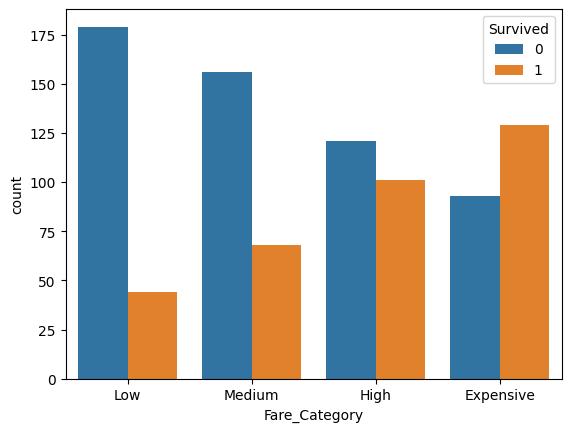

In [10]:
sns.countplot(df,x = 'Fare_Category',hue = 'Survived')

**You can see there is a complete correlation between the price of the ticket and survival project**

**Pie plot for Survival according to sex**

<Axes: ylabel='Survived'>

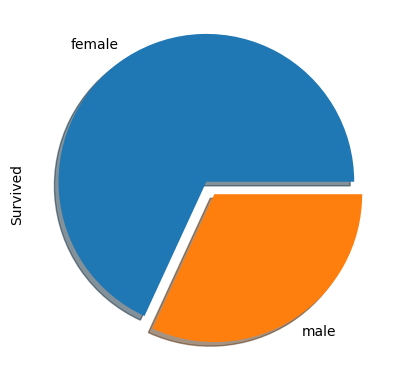

In [11]:
explode = [0.1,0];
df.groupby('Sex')['Survived'].sum().plot(kind = 'pie',explode = explode, shadow = True)
# Now the reason the .sum() doesn't count the not survived category cuz the 0's naturally doesn't add in ths sum operations

Here we can clearly see that among the survivors the female had clearly the larger proportion

# Let's make a age distribution now with the help of histogram

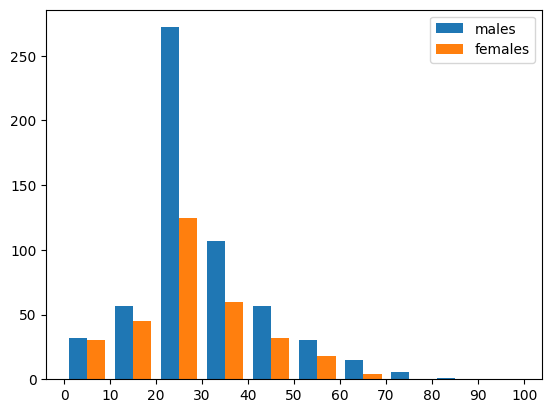

In [12]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist([df.loc[df['Sex']=='male','Age'],df.loc[df['Sex']=='female','Age']],bins = bins, label = ['males','females'])
plt.xticks(bins)
plt.legend()
plt.show()

We can clearly see the males are more than the females and we can also confer that according to their particular age. Though there is not uch difference among children